# Gabor connectivity

## 2018-05-08

This notebook is the development and demonstration of the Gabor python connection script for the Ventral Stream model.

The input is a 2500 vector of x/y coordinates from a 50x50 grid.

The output is a list of connection weights between src/dst pairs.

In [1]:
#PARNAME=sigma_g  #LOC=1,1
#PARNAME=gain_g   #LOC=1,2
#PARNAME=lambda_s #LOC=2,1
#PARNAME=gain_s   #LOC=2,2
#PARNAME=dir_s    #LOC=3,1
#PARNAME=weight_cutoff # LOC=3,2
#HASWEIGHT

# This implements a Gabor connection; a 2-D Gaussian multiplied by a 1-D sine. Arguments:
# sigma_g - sigma of the gaussian
# gain_g - a gain for the gaussian
# lambda_s - wavelength of sine
# gain_s - gain of sine
# dir_s - direction of (1-D) sine in degrees
def connectionFunc(srclocs,dstlocs,sigma_g,gain_g,lambda_s,gain_s,dir_s,weight_cutoff):

    import math
    twopi = 6.283185307;
    i = 0
    j = 0
    out = []
    for srcloc in srclocs:
        j = 0   
        for dstloc in dstlocs:

            dist = math.sqrt(math.pow((srcloc[0] - dstloc[0]),2) + math.pow((srcloc[1] - dstloc[1]),2) + math.pow((srcloc[2] - dstloc[2]),2))

            # Direction from source to dest
            dir_d = math.atan2(dstloc[1]-srcloc[1], dstloc[0]-srcloc[0]);

            # Find the projection of the source->dest direction onto the sine wave direction. Call this distance rprime.
            rprime = dist*math.cos(dir_d + twopi - ((dir_s*twopi)/360));

            # Use rprime to figure out what the sine weight is.
            sine_weight = gain_s*rprime*math.sin(rprime*twopi/lambda_s);

            gauss_weight = gain_g*math.exp(-0.5*math.pow(dist/sigma_g,2))

            combined_weight = sine_weight * gauss_weight;

            if abs(combined_weight) > weight_cutoff:
                #sys.stdout.write('gauss>0.0001: i={0} gauss={1}'.format( i, gauss))
                conn = (i,j,0,combined_weight)
                out.append(conn)

            j = j + 1
        i = i + 1
    #sys.stdout.write('out length: %d' % len(out))
    return out

In [5]:
# Compute weights for the map
sigma_g = 3
gain_g = 1
lambda_s = 20
gain_s = 1
dir_s = 0
weight_cutoff = 0.00001

srclocs = []
for i in range(0, 50):
    for j in range(0, 50):
        srcloc=[j,i,0]
        srclocs.append(srcloc)

result = connectionFunc (srclocs, srclocs, sigma_g, gain_g, lambda_s, gain_s, dir_s, weight_cutoff)

print "Done computing"

#i = 0
#for res in result:
#    i = i + 1
#    print res[0],res[1],res[2],res[3]
#    if i>1000:
#        break

#for srcloc in srclocs:
#    print srcloc[0],srcloc[1],srcloc[2]

Done computing


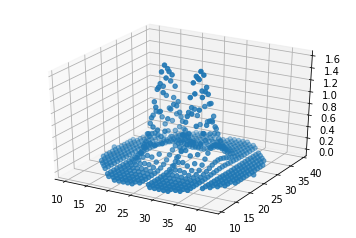

In [6]:
# Show weight results for one particular source neuron projecting out to destination neurons.
import math

src_index = 1276

rowlen = 50
i = 0

# Extract xs, ys and weights for src to destination connection
xs = []
ys = []
ws = []
for res in result:
    i = i + 1
    if (res[0] == src_index):
        spos = (res[0]%rowlen,math.floor(res[0]/rowlen))
        dpos = (res[1]%rowlen,math.floor(res[1]/rowlen),res[3])
        xs.append(res[1]%rowlen)
        ys.append(math.floor(res[1]/rowlen))
        ws.append(res[3])

#%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,ws)

plt.show()

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)
